<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [1]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem
from scipy.stats import norm, sem, beta

import pylab as plt

   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB
None


<AxesSubplot:xlabel='version'>

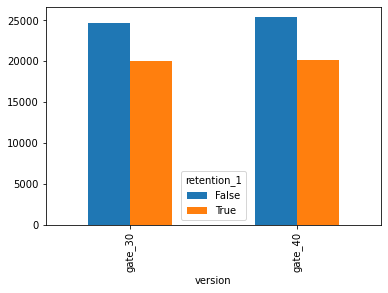

In [2]:
# datos
game = pd.read_csv('data/cookie_cats.csv')
print(game.head())
print(game.info())

pd.crosstab(game.version, game.retention_1)

pd.crosstab(game.version, game.retention_1).plot(kind='bar')

In [3]:
# transformacion
control = game[game.version == 'gate_30']
test = game[game.version == 'gate_40']

imps_ctrl, convs_ctrl = len(control), len(control[control.retention_1 == True])
imps_test, convs_test= len(test), len(test[test.retention_1 == True])

CR_ctrl=convs_ctrl/imps_ctrl
CR_test=convs_test/imps_test
Control={CR_ctrl}
print(Control)
Test={CR_test}
print(Test)

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_control=beta(a_C, b_C)
beta_test=beta(a_T, b_T)
beta_control.mean(), beta_test.mean()


{0.4481879194630872}
{0.44228274967574577}


(0.44819023757326293, 0.44228528719966587)

-0.013175098158249857


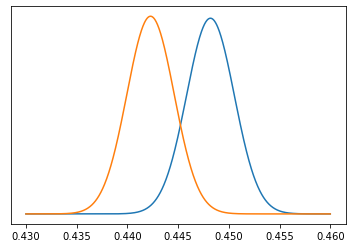

In [4]:
# muestreo



x=np.linspace(0.43, 0.46, 1000)

def plot(betas, nombres):
    for bet, nom in zip(betas, nombres):
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])


plot([beta_control, beta_test], ['control', 'test'])

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

salto=(beta_test.mean()-beta_control.mean())/beta_control.mean()

print(salto)

In [5]:
# testeo para retention_1
prob = 1 - beta_control.cdf(0.44524)

control = game[game.version == 'gate_30']
test = game[game.version == 'gate_40']

imps_ctrl, convs_ctrl = len(control), len(control[control.retention_7 == True])
imps_test, convs_test= len(test), len(test[test.retention_7 == True])

CR_ctrl=convs_ctrl/imps_ctrl
CR_test=convs_test/imps_test

f'TASAS: Control={CR_ctrl}, Test={CR_test}'

'TASAS: Control=0.19020134228187918, Test=0.18200004396667327'

-0.013175098158249857


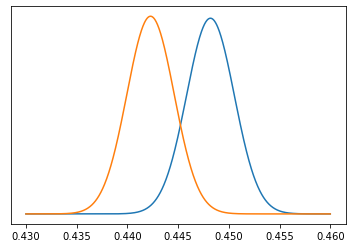

In [6]:
# testeo para retention_7
plot([beta_control, beta_test], ['control', 'test'])

salto=(beta_test.mean()-beta_control.mean())/beta_control.mean()
print(salto)

prob = 1 - beta_control.cdf(0.18606)

In [ ]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.